# Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [2]:

TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt' 
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt' 

VOCAB_SIZE = 2500

# Load the Data

In [3]:
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')

prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

# Calculating the Joint Probability

### The Dot Product

In [4]:
X_test.shape

(1724, 2500)

In [5]:
prob_token_spam.shape

(2500,)

In [6]:
X_test.dot(prob_token_spam).shape # I can't do it this way => prob_token_spam.dot(X_test).shape because 
# the values are not aligned [(1724, 2500)] * [(2500,)] != [(2500,)] * [(1724, 2500)]. where the former is
# the correct way of doing it since the col of the first matrix(2500 )is aligned properly with the row of the second matrix(2500 )
# also this is the right way to do it since we are multiplying the column of the 2d array by the row of the 1d array

(1724,)

## Set the Prior

## $$ P(Spam \, | \, X) =  \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)}$$

<p> A prior is a belief or guess about a quantity. In our case, we already have a calculated "guess", which is the probability of spam = 0.3109 </p>

In [7]:
PROB_SPAM = 0.3109

In [8]:
np.log(prob_token_spam)

array([ -4.40768141,  -5.25375622,  -4.99015865, ...,  -9.79171765,
        -9.52935339, -10.70800838])

## Joint Probability in Log Format

In [9]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)
joint_log_spam[:5]
# since we are using log format instead of dividing by p(X) we'll subtract the prob_token_spam from 
# prob_all_tokens and also we won't be multiplying against the p(Spam) rather we'll be adding it up

array([24.26609396,  2.15741368, 20.58593663, 17.73868148, 20.49790994])

## $$ P(Ham \, | \, X) =  \frac{P(X \, | \, Ham \,) \, (1 - P(Spam) )} {P(X)}$$

In [10]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1 - PROB_SPAM)
joint_log_ham[:5]

array([-60.9615197 , -11.00803242, -37.96485145, -59.12449324,
       -53.78250218])

In [11]:
joint_log_ham.size

1724

In [12]:
joint_log_spam.size

1724

# Making Predictions

### Checking for the Higher Joint Probability

$$ P(Spam \, | \, X) >  P(Ham \, | \, X) $$
<br>
<center><b> OR </b></center>
<br>
$$ P(Spam \, | \, X) <  P(Ham \, | \, X) $$

In [13]:
prediction = []

for i in range(1724):
    if joint_log_spam[i] > joint_log_ham[i]:
        prediction.append(1)
    elif joint_log_ham[i] > joint_log_spam[i]:
        prediction.append(0)


In [14]:
prediction = np.array(prediction)

In [15]:
len(prediction)

1724

In [16]:
prediction[-5:]

array([1, 0, 0, 0, 0])

In [17]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

### Simplifying

In [18]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1 - PROB_SPAM)

<h4> Understand: </h4>
<p> I can do what I did above because since we are trying to predict  if an email is spam or not , that prediction won't depend on p(X) which was represented by "- np.log(prob_all_tokens)". And so removing that part of the code won't break the calculation </p>

# Metrics & Evaluation

## Accuracy

In [19]:
correct_docs = (y_test == prediction).sum()
print(f"The total number of correctly classified docs. is {correct_docs}")
numdocs_wrong = X_test.shape[0] - correct_docs
print(f"The total number of incorrectly classified docs. is {numdocs_wrong}")

The total number of correctly classified docs. is 1685
The total number of incorrectly classified docs. is 39


In [20]:
# accuracy = nr. of correct predictions / total nr. of predictions

accuracy = correct_docs / X_test.shape[0]
print(accuracy)

0.9773781902552204


## Visualizing the Results

In [21]:
xaxis_label = 'P(X | NonSpam)'
yaxis_label = 'P(X | Spam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

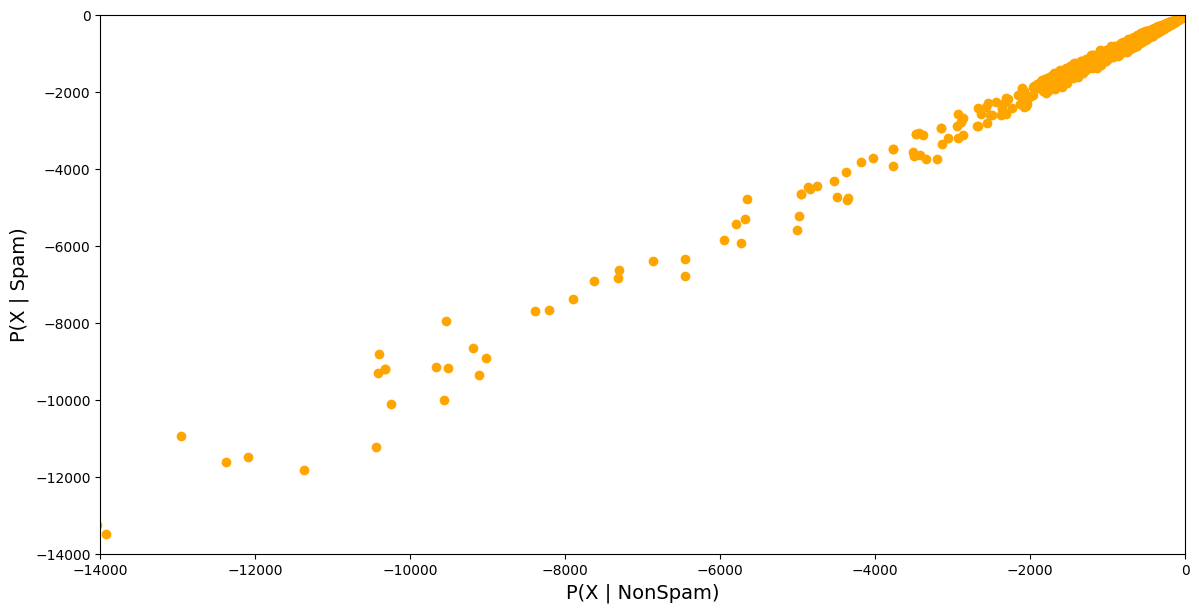

In [22]:
plt.figure(figsize=(14, 7), dpi=100)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])
plt.scatter(joint_log_ham, joint_log_spam, c='orange')
plt.show()

## The Decision Boundary

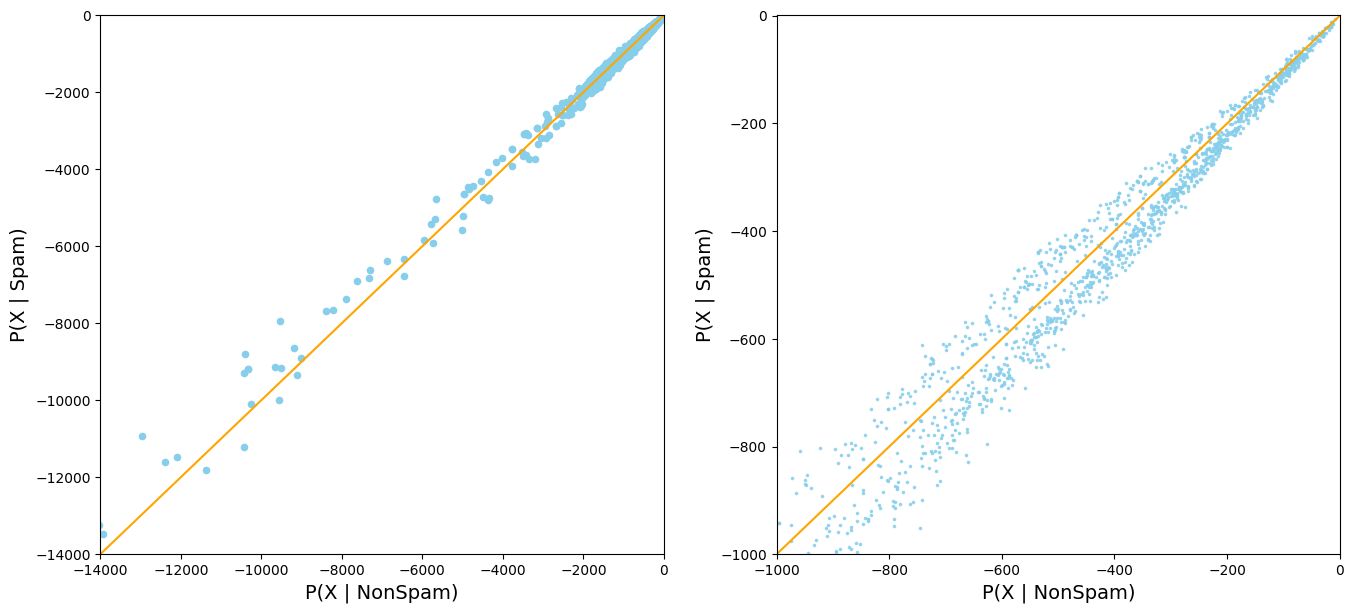

In [23]:
plt.figure(figsize=(16, 7), dpi=100)

# chart nr. 1
plt.subplot(1, 2, 1)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, c='skyblue', s=20)
plt.plot(linedata, linedata, c='orange')

# chart nr. 2
plt.subplot(1, 2, 2)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

plt.xlim([-1000, 1])
plt.ylim([-1000, 1])

plt.scatter(joint_log_ham, joint_log_spam, c='skyblue', alpha=0.8, s=2.5)
plt.plot(linedata, linedata, c='orange')

plt.show()

In [24]:
sns.set_style('whitegrid')
labels = 'Actual category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels: y_test})

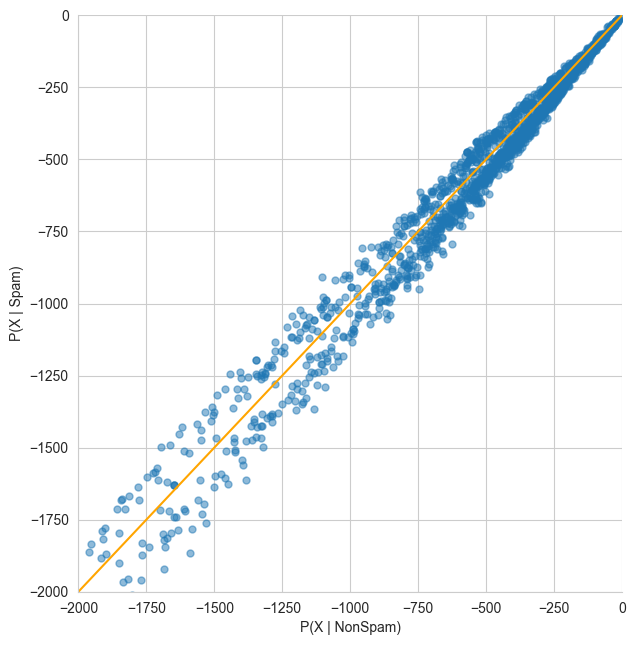

In [25]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df,
           height=6.5, fit_reg=False, scatter_kws={'alpha':0.5, 's':25})
plt.plot(linedata, linedata, c='orange')
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.show()

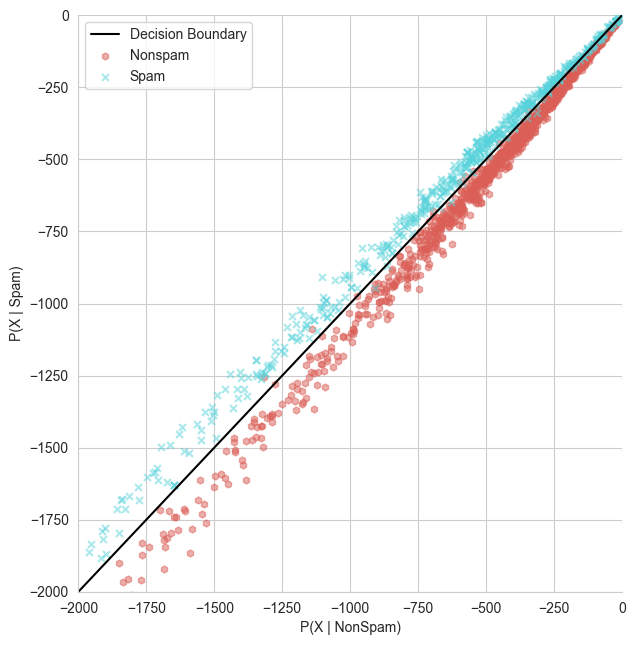

In [26]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df,
           height=6.5, fit_reg=False, scatter_kws={'alpha':0.5, 's':25},
           hue=labels, markers=['h', 'x'], palette='hls', legend=False)

plt.plot(linedata, linedata, c='black')
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='upper left')

plt.show()

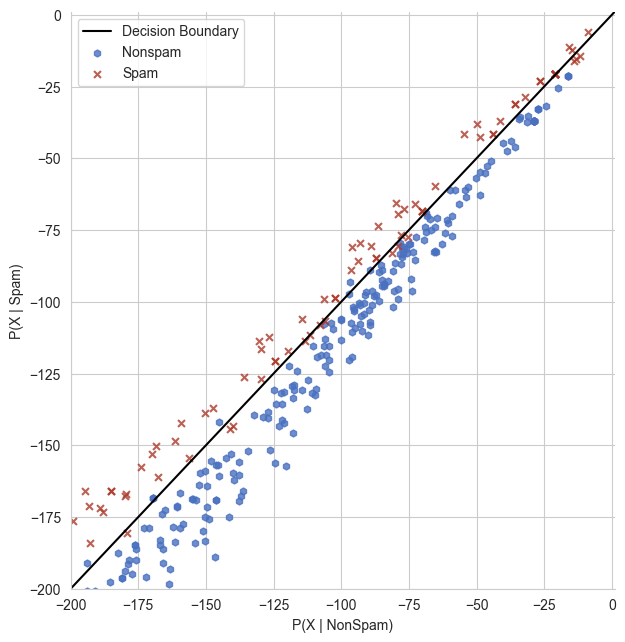

In [27]:
my_palette = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df,
           height=6.5, fit_reg=False, scatter_kws={'alpha':0.8, 's':25},
           hue=labels, markers=['h', 'x'], palette=my_palette, legend=False)

plt.plot(linedata, linedata, c='black')
plt.xlim([-200, 1])
plt.ylim([-200, 1])

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='upper left')

plt.show()

## False Positives and False Negatives
<p> False Positive occurs in our spam classifier is when an email is legitimate but classified as Spam</p>
<p>False Negative occurs in our spam classifier when a spam email is classified as legitimate</p>

In [28]:
np.unique(prediction, return_counts=True)

(array([0, 1]), array([1136,  588]))

In [29]:
true_pos = (y_test == 1) & (prediction == 1)

In [30]:
true_pos.sum()

569

In [31]:
false_neg = (y_test == 1) & (prediction == 0)

In [32]:
false_neg.sum()

20

In [33]:
false_pos = (y_test == 0) & (prediction == 1)

In [34]:
false_pos.sum()

19

## Recall Score

In [41]:
# recall_score = true positives / (true positives + false negatives)
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall score is {:.2%}'.format(recall_score))

Recall score is 96.60%


## Precision

In [43]:
#precision = true positives / (true positives + false positives)
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3}'.format(precision_score))

Precision score is 0.968


## F-Score or F1 Score

In [44]:
# f score = 2 * [(precision_score * recall_score) / (precision_score + recall_score)]
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))

F Score is 0.97
